### 豆瓣读书TOP250数据分析


In [419]:
# -*- coding: utf-8 -*-

# 导入各种包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline  # jupyter自带的方式，允许图表在cell中输出
from matplotlib.font_manager import FontProperties   
# 使轴标签的中文能够正常显示
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
 
plt.style.use("ggplot") 
# 为了图表的样式更加美观，使用R语言中的ggplot2配色作为绘图风格

font_set = FontProperties(fname=r"/Users/fountain/Desktop/pandas/Songti.ttc", size=10) 
df = pd.read_excel("/Users/fountain/Desktop/spider/dou.xlsx")
df.head()


,name,url,author,publisher,date,price,rate,commentnum,comment
0,追风筝的人,https://book.douban.com/subject/1770782/,[美] 卡勒德·胡赛尼,上海人民出版社,2006-5,29.0,8.9,(\n 306608人评价\n ...,为你，千千万万遍
1,小王子,https://book.douban.com/subject/1084336/,[法] 圣埃克苏佩里,人民文学出版社,2003-8,22.0,9,(\n 237793人评价\n ...,献给长成了大人的孩子们
2,围城,https://book.douban.com/subject/1008145/,钱锺书,人民文学出版社,1991-2,19.0,8.9,(\n 196714人评价\n ...,对于“人艰不拆”四个字最彻底的违抗
3,解忧杂货店,https://book.douban.com/subject/25862578/,[日] 东野圭吾,南海出版公司,2014-5,19.0,8.6,(\n 272443人评价\n ...,一碗精心熬制的东野牌鸡汤，拒绝很难
4,活着,https://book.douban.com/subject/1082154/,余华,南海出版公司,1998-5,12.0,9.1,(\n 142733人评价\n ...,活着本身就是人生最大的意义


In [420]:
# len(df.name.unique())  # 比如《白夜行》有2本，因为出版时间不一样，在此将它们视为不一样

 ### 数据清理


In [421]:
# 观察数据，可以看到commentnum（评价数量）只需要留下数字

# def cut_word(word):
#     position = word.find(u'出')
#     a_price = word[:position]
#     return a_price

# df.publisher.apply(cut_word)

In [422]:
df["commentnum"] = df["commentnum"].str[22:-21]

# 输出书籍名为《白夜行》的全部信息，  在列名前面加一个u，来代表中文
df[df.name==u'白夜行']

,name,url,author,publisher,date,price,rate,commentnum,comment
5,白夜行,https://book.douban.com/subject/3259440/,[日] 东野圭吾,南海出版公司,2008-9,29.8,9.1,206872,暗夜独行的残破灵魂，爱与恶本就难分难舍
20,白夜行,https://book.douban.com/subject/10554308/,东野圭吾,南海出版公司,2013-1-1,39.5,9.2,109208,封面剧透


In [423]:
# 将date这一列分离出“年份”，作为year一列
df['year'] = df.date.str[:5]
df

,name,url,author,publisher,date,price,rate,commentnum,comment,year
0,追风筝的人,https://book.douban.com/subject/1770782/,[美] 卡勒德·胡赛尼,上海人民出版社,2006-5,29.0,8.9,306608,为你，千千万万遍,2006
1,小王子,https://book.douban.com/subject/1084336/,[法] 圣埃克苏佩里,人民文学出版社,2003-8,22.0,9,237793,献给长成了大人的孩子们,2003
2,围城,https://book.douban.com/subject/1008145/,钱锺书,人民文学出版社,1991-2,19.0,8.9,196714,对于“人艰不拆”四个字最彻底的违抗,1991
3,解忧杂货店,https://book.douban.com/subject/25862578/,[日] 东野圭吾,南海出版公司,2014-5,19.0,8.6,272443,一碗精心熬制的东野牌鸡汤，拒绝很难,2014
4,活着,https://book.douban.com/subject/1082154/,余华,南海出版公司,1998-5,12.0,9.1,142733,活着本身就是人生最大的意义,1998
5,白夜行,https://book.douban.com/subject/3259440/,[日] 东野圭吾,南海出版公司,2008-9,29.8,9.1,206872,暗夜独行的残破灵魂，爱与恶本就难分难舍,2008
6,挪威的森林,https://book.douban.com/subject/1046265/,[日] 村上春树,上海译文出版社,2001-2,18.8,8,192642,村上之发轫，多少人的青春启蒙,2001
7,嫌疑人X的献身,https://book.douban.com/subject/3211779/,[日] 东野圭吾,南海出版公司,2008-9,28.0,8.9,159458,数学好是一种极致的浪漫,2008
8,三体,https://book.douban.com/subject/2567698/,刘慈欣,重庆出版社,2008-1,28.0,8.8,162206,你我不过都是虫子,2008
9,不能承受的生命之轻,https://book.douban.com/subject/1017143/,[捷克] 米兰·昆德拉,上海译文出版社,2003-7,23.0,8.5,138849,朝向媚俗的一次伟大的进军,2003


In [424]:
# 数据清理基本完成，切选出我们想要的内容即可
df_clean = df[['name','author','publisher','price','year','rate','comment','commentnum']]
df_clean

,name,author,publisher,price,year,rate,comment,commentnum
0,追风筝的人,[美] 卡勒德·胡赛尼,上海人民出版社,29.0,2006,8.9,为你，千千万万遍,306608
1,小王子,[法] 圣埃克苏佩里,人民文学出版社,22.0,2003,9,献给长成了大人的孩子们,237793
2,围城,钱锺书,人民文学出版社,19.0,1991,8.9,对于“人艰不拆”四个字最彻底的违抗,196714
3,解忧杂货店,[日] 东野圭吾,南海出版公司,19.0,2014,8.6,一碗精心熬制的东野牌鸡汤，拒绝很难,272443
4,活着,余华,南海出版公司,12.0,1998,9.1,活着本身就是人生最大的意义,142733
5,白夜行,[日] 东野圭吾,南海出版公司,29.8,2008,9.1,暗夜独行的残破灵魂，爱与恶本就难分难舍,206872
6,挪威的森林,[日] 村上春树,上海译文出版社,18.8,2001,8,村上之发轫，多少人的青春启蒙,192642
7,嫌疑人X的献身,[日] 东野圭吾,南海出版公司,28.0,2008,8.9,数学好是一种极致的浪漫,159458
8,三体,刘慈欣,重庆出版社,28.0,2008,8.8,你我不过都是虫子,162206
9,不能承受的生命之轻,[捷克] 米兰·昆德拉,上海译文出版社,23.0,2003,8.5,朝向媚俗的一次伟大的进军,138849


In [425]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
name          250 non-null object
author        250 non-null object
publisher     250 non-null object
price         250 non-null float64
year          250 non-null object
rate          250 non-null object
comment       250 non-null object
commentnum    250 non-null object
dtypes: float64(1), object(7)
memory usage: 15.7+ KB


In [426]:
# 将rate的类型转换为float64
df_clean.loc[:,'rate'] = df_clean.loc[:,'rate'].astype('float64')

In [427]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
name          250 non-null object
author        250 non-null object
publisher     250 non-null object
price         250 non-null float64
year          250 non-null object
rate          250 non-null float64
comment       250 non-null object
commentnum    250 non-null object
dtypes: float64(2), object(6)
memory usage: 15.7+ KB


### 对数据进行描述统计

In [428]:
# value_counts()为计数，降序输出一个series类型的结果
df_pub = df_clean.publisher.value_counts()

# 在TOP250榜单中，出版书籍数量排名前10的出版社
# df_pub.sort_values(ascending=False)[:10]
df_pub[:10]

 人民文学出版社          29
 上海译文出版社          23
 南海出版公司           23
 长江文艺出版社          12
 作家出版社             9
 生活·读书·新知三联书店      9
 译林出版社             9
 中国友谊出版公司          9
 北京十月文艺出版社         8
 新世界出版社            5
Name: publisher, dtype: int64

In [429]:
# 按照publisher进行分组，求出price和rate的平均值
df_clean.groupby('publisher').mean()

,price,rate
publisher,,
Arthur A. Levine Books,34.990000,8.900000
万卷出版公司,25.000000,7.500000
三联书店,0.000000,8.500000
上海三联书店,25.000000,8.600000
上海书店出版社,14.500000,8.700000
上海人民出版社,24.250000,8.275000
上海文艺出版社,21.500000,7.850000
上海社会科学院出版社,25.000000,8.600000
上海译文出版社,20.321739,8.447826


In [430]:
# 对于书籍的价格和评分，用describe函数可以快速生成各类统计指标，如平均数
# 标准差、中位数、最大值等
df_clean.describe()

,price,rate
count,250.000000,250.000000
mean,30.084800,8.317200
std,33.594063,0.662889
min,0.000000,6.200000
25%,19.000000,7.900000
50%,25.000000,8.400000
75%,29.800000,8.800000
max,358.200000,9.600000


### 对数据进行探索性分析

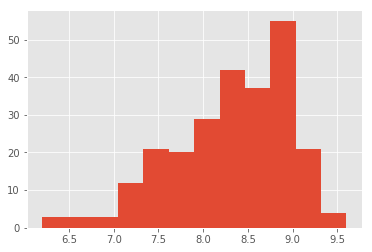

In [431]:

df_clean.rate.hist(bins=12)
# 可以看出评分在8.0-9.0之间，不愧为排名豆瓣前250的优秀书籍
# bins参数是为了更细的粒度，将直方图的宽距缩小点

In [432]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
name          250 non-null object
author        250 non-null object
publisher     250 non-null object
price         250 non-null float64
year          250 non-null object
rate          250 non-null float64
comment       250 non-null object
commentnum    250 non-null object
dtypes: float64(2), object(6)
memory usage: 15.7+ KB


In [433]:
# # 现在观察评分人数和作者对评分的影响，画出箱线图

# ax = df.boxplot(column='rate', by='publisher',figsize=(100,50))
# xmajorLocator   = MultipleLocator(1) #将x主刻度标签设置为1的倍数

# #设置主刻度标签的位置,标签文本的格式
# ax.xaxis.set_major_locator(xmajorLocator)
# ax.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度

# for label in ax.get_xticklabels():
#     label.set_fontproperties(font_set)
    

In [434]:
# 筛选出评分在9分以上的书籍，并按评分作降序排序
df_clean[df_clean.rate>=9.0].sort_values(by='rate',ascending=False)[:10]

,name,author,publisher,price,year,rate,comment,commentnum
10,红楼梦,[清] 曹雪芹 著,人民文学出版社,59.7,1996,9.6,谁解其中味？,128355
184,机器猫哆啦A梦23,藤子9ЧF9Ч不二雄,吉林美术出版社,8.0,1999,9.5,满满的回忆,27881
119,灌篮高手31,[日] 井上雄彦,长春出版社,7.5,2005,9.5,全剧终,27167
205,海贼王,尾田荣一郎,浙江人民美术出版社,7.5,2007,9.5,热血，梦想，希望,26541
85,一九八四·动物农场,[英] 乔治·奥威尔,上海译文出版社,23.0,2003,9.3,一个预言和一个寓言，令人窒息的政治恐怖,25164
48,活着,余华,作家出版社,20.0,2012,9.3,生的苦难与伟大,85165
140,1984,[英] 乔治·奥威尔,北京十月文艺出版社,28.0,2010,9.3,栗树荫下，我出卖你，你出卖我,44532
162,撒哈拉的故事,三毛,北京十月文艺出版社,24.0,2011,9.3,不枉来这世上走一遭,35989
21,三体Ⅱ,刘慈欣,重庆出版社,32.0,2008,9.3,无边的黑暗森林，比第一部更为恢弘壮丽,96160
22,飘,[美国] 玛格丽特·米切尔,译林出版社,40.0,2000,9.3,革命时期的爱情，随风而逝,81512


In [435]:
# 在这个TOP250中，出版的书籍数量排名前10的出版社，按从多到少排序，
# 并计算出其评分的平均数
df_clean.groupby('publisher').rate.agg(['count','mean']).sort_values(by='count',ascending=False)[:10]
# 人民文学出版社位列第一，共有29本

,count,mean
publisher,,
人民文学出版社,29,8.772414
南海出版公司,23,8.456522
上海译文出版社,23,8.447826
长江文艺出版社,12,7.641667
作家出版社,9,7.955556
译林出版社,9,8.300000
生活·读书·新知三联书店,9,8.800000
中国友谊出版公司,9,8.600000
北京十月文艺出版社,8,8.625000


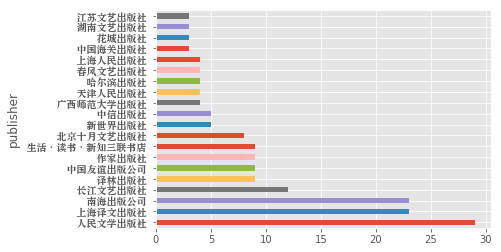

In [436]:
publisher_df = df_clean.groupby('publisher').rate.count().sort_values(ascending=False).head(20)
ax = publisher_df.plot(kind='barh', rot=0)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_set)
plt.savefig("hei.jpg")
plt.show()

In [437]:
df_clean.groupby('author').name.count().sort_values(ascending=False).head(10)

author
[日] 村上春树         9
当年明月             8
安妮宝贝             8
韩寒               7
郭敬明              7
张爱玲              6
[英] J. K. 罗琳     6
金庸               6
三毛               5
王小波              5
Name: name, dtype: int64

In [438]:
# 类似地，书籍数量排名前10的作者，按从多到少排序
author_df = df_clean.groupby('author').name.count().sort_values(ascending=False).head(20)
# 从结果看，日本作家村上春树的作品整体上很受读者的欢迎，安妮宝贝位居第二，当年明月排第三，
# 而对于80后，90后熟知的作家韩寒、郭敬明紧随其后

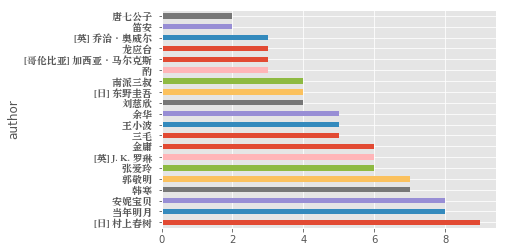

In [439]:
ax = author_df.plot(kind='barh', rot=0)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_set)
    
plt.show()

In [440]:
# 书籍年份分析
data = pd.DataFrame(df_clean.groupby(['year']).agg({'rate':'mean','name':'count'}))
data.columns = ['avgRate','yearNum']
year_df = data.sort_values(['yearNum'],ascending=False)
year_df[:10]

# df_clean.groupby('year').rate.count().sort_values(ascending=False)

,avgRate,yearNum
year,,
2007,8.197059,34
2009,8.259091,22
2006,8.157143,21
2010,8.138095,21
2008,8.429412,17
2003,8.380000,15
2005,8.185714,14
2004,8.221429,14
1997,8.688889,9


Text(0,0.5,u'num')

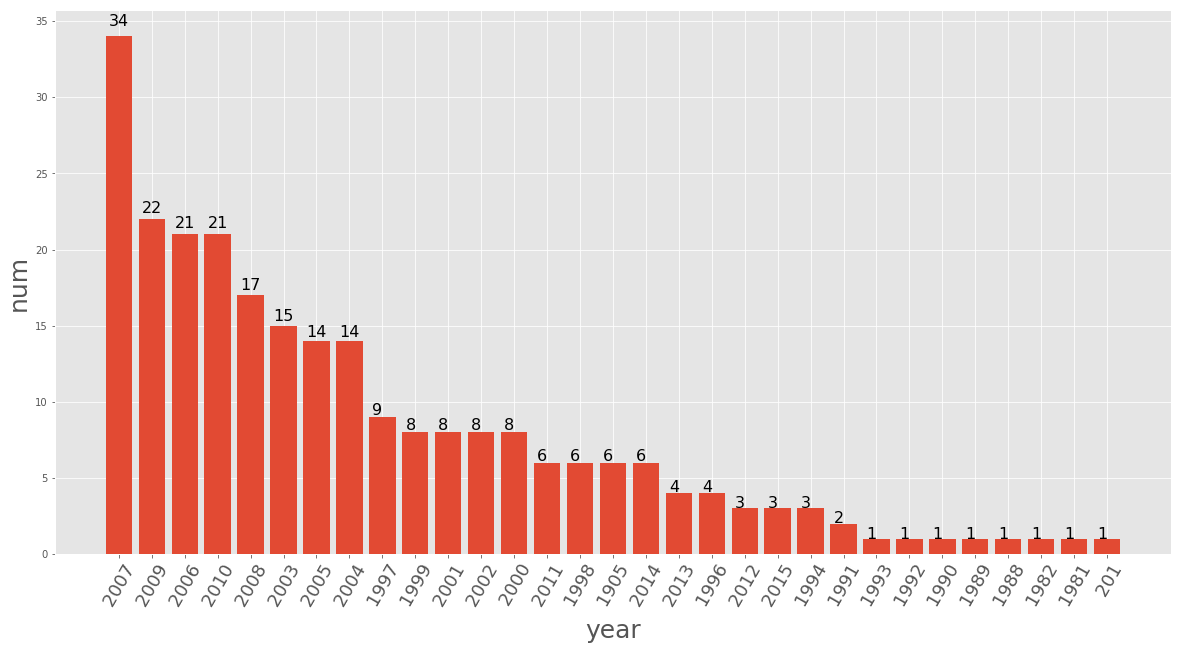

In [444]:
# 画柱状图
fig,ax = plt.subplots(1,1,figsize=(20,10))
rect = ax.bar(np.arange(len(year_df.index)),year_df['yearNum'],width=0.8)
for rec in rect:
    x = rec.get_x()
    height = rec.get_height()
    ax.text(x+0.1,1.02*height, str(height),fontsize=16)
    
ax.set_xticks(np.arange(len(year_df.index)))
ax.set_xticklabels(year_df.index,size=18,rotation=60)
    
ax.set_xlabel('year',size=25)
ax.set_ylabel('num',size=25)


In [442]:
# 由上图可以分析发现，TOP250豆瓣书籍中，书籍数量排名前六的年份依次为2007，2009，2006，
# 2010，2003，2008，年份都比较集中，说明进入21世纪以来的前几年是作家们创作的好时期。

{u'\u5e73\u884c\u7ebf': 0.24094542008033262, u'\u6d6a\u6f2b\u4e3b\u4e49': 0.24730176024643324, u'\u68a6\u60f3': 0.2586736216580569, u'\u9769\u547d': 0.2453740149103127, u'\u8bb0\u5f97': 0.30442791497660804, u'\u865a\u6784': 0.27710258904570106, u'\u5149\u8292': 0.2621287927576571, u'\u4e16\u754c': 0.4422556636938834, u'\u5e7b\u591c': 0.28150278720792155, u'\u9700\u8981': 0.250527465411308, u'\u7231\u60c5': 0.7613767493559281, u'\u4e1c\u91ce': 0.47910474002124565, u'\u5c0f\u8bf4': 0.5076714497552762, u'\u9057\u5fd8': 0.3102455641964949, u'\u5b58\u5728': 0.2617545540955249, u'\u5c01\u9762': 0.3897093105715109, u'\u751f\u6d3b': 1.0, u'\u5e03\u5229': 0.28150278720792155, u'\u610f\u4e49': 0.33709327014881946, u'\u76f8\u9047': 0.29121903670780613, u'\u975e\u5178\u578b': 0.2790068930861847, u'\u624b\u518c': 0.3501818083695237, u'\u90fd\u5e02': 0.2416666858659743, u'\u4e2d\u56fd': 0.5715903713419644, u'\u51fa\u5356': 0.2900970795323742, u'\u5e0c\u671b': 0.27192687837460267, u'\u6c11\u65cf': 0.

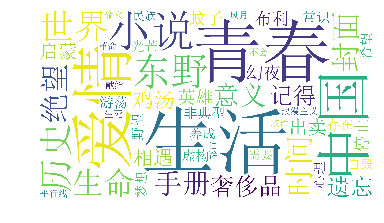

In [443]:
import jieba.analyse
from wordcloud import WordCloud

g = lambda x,y:x+y
m = reduce(g,df_clean['comment'])
result = jieba.analyse.textrank(m, topK=50,withWeight=True)
keywords = dict()
for i in result:
    keywords[i[0]] = i[1]
print(keywords)

def show_img(wc):
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.savefig("ciyun.jpg")
    
wc = WordCloud(font_path=u"/Users/fountain/Desktop/pandas/SimSun.ttf",
               max_words=2000,
               width=1920,
               height=1080,
               background_color="white",
               margin=5)

wc.generate_from_frequencies(keywords)
show_img(wc)